
# **Diamond price data set**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **About this data**


This diamond dataset includes features that influence a diamond's value: carat (weight), cut, color, clarity (all indicators of quality), depth, table (proportions affecting appearance), and dimensions (x, y, z). The target is price. Carat weight and quality metrics like color, cut, and clarity often correlate with price, while depth and table ratios can impact brilliance. To improve predictions, we can calculate volume (x * y * z), encode categorical features (cut, color, clarity), and explore interaction terms. Log-transforming price might also help if its distribution is skewed.

## **Columns and Their Descriptions:**

- carat:

This represents the weight of the diamond and is usually a strong predictor of price. Higher carat values typically correlate with higher prices.

- cut:

A categorical variable indicating the quality of the diamond’s cut. Common categories include Ideal, Premium, Good, Very Good, and Fair.
The cut can affect how light reflects within the diamond, potentially influencing its visual appeal and price.

- color:

Represents the color grade of the diamond, usually ranging from D (colorless) to J (slightly colored).
Diamonds closer to colorless are generally more valuable, so this feature might correlate with price.

- clarity:

A categorical variable indicating the clarity or purity of the diamond. Common grades include IF (internally flawless), VVS1, VVS2, VS1, VS2, SI1, SI2, and I1, where fewer inclusions (flaws) generally lead to higher prices.

- depth:

The depth percentage, calculated as
(
𝑧
/
(
𝑥
+
𝑦
)
/
2
)
×
100
(z/(x+y)/2)×100.
It’s a measure of how tall the diamond is relative to its width and can affect how light passes through the diamond.

- table:

The width of the diamond's top facet (in percentage), often influencing how it catches light. Diamonds with ideal table percentages are typically more valuable.

- price:

The target variable in this dataset, representing the diamond’s price in U.S. dollars.

- x, y, z:

The diamond's length, width, and height (in millimeters), respectively.
These dimensions are often useful for calculating volume or approximate the diamond's size.

## **Target Varible:**
 - - price: The target variable in this dataset, representing the diamond’s price in U.S. dollars.



## **Problem statement:-**

-
Predict the price of a diamond based on its physical characteristics and quality attributes, including carat, cut, color, clarity, and dimensions. The goal is to create a model that accurately estimates diamond prices to support valuation. Feature engineering will focus on volume calculation, categorical encoding, and interaction terms for improved accuracy.

## Understanding the data

In [ ]:
# Loading the diamonds dataset
df=pd.read_csv('/content/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()# Checking data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(df.isnull().sum()) # there is no null values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


## **data cleaning**

In [ ]:
df.shape

(50000, 10)

In [ ]:
df.drop_duplicates(inplace=True)
# there is duplicates in this data

In [ ]:
df.shape

(49874, 10)

### In data cleaning step there is no null values, but there duplicates and its droped

# Descriptive statistics

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.799331,61.751803,57.458786,3945.384569,5.734441,5.738060,3.541028
std,0.474607,1.428207,2.231087,3996.939331,1.122340,1.144973,0.706607
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2414.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5352.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Visualization

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='carat', ylabel='Count'>

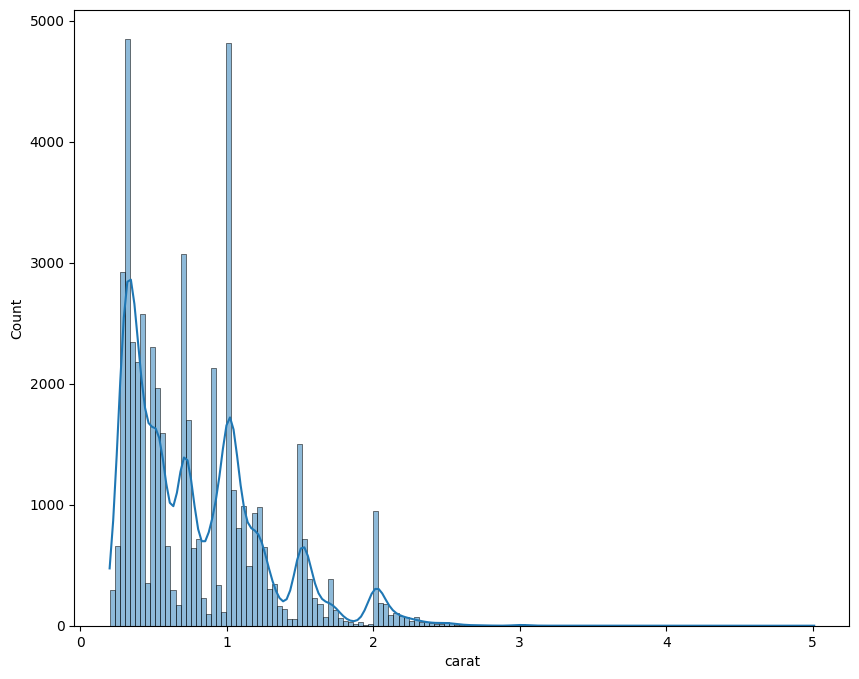

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="carat",kde=True)

Key Insights:
Skewed Distribution:

The carat distribution is right-skewed (positively skewed), meaning most diamonds have lower carat values.
This is typical since smaller diamonds are more common and affordable compared to larger diamonds.

<Axes: xlabel='cut', ylabel='count'>

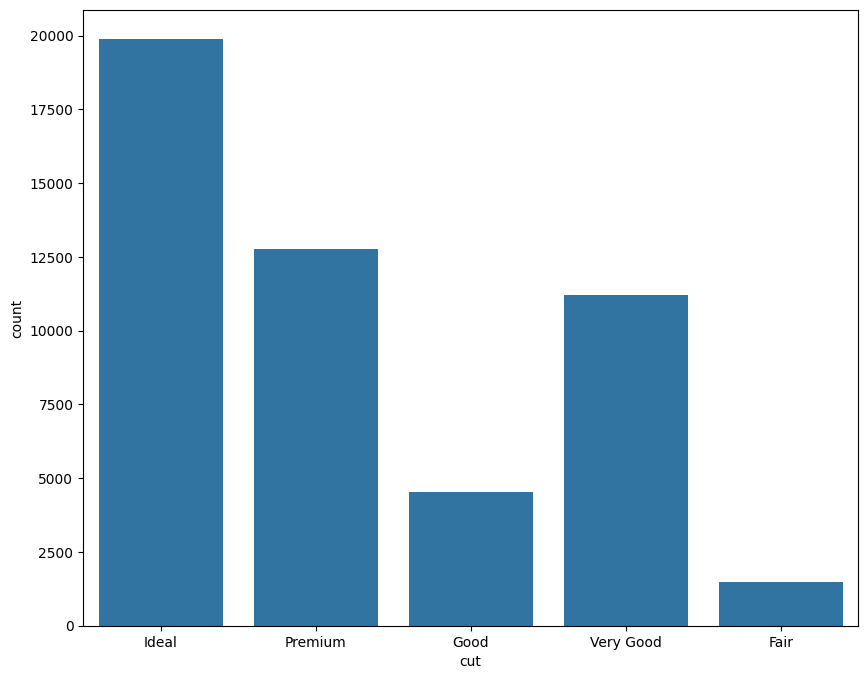

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="cut")

<Axes: xlabel='color', ylabel='count'>

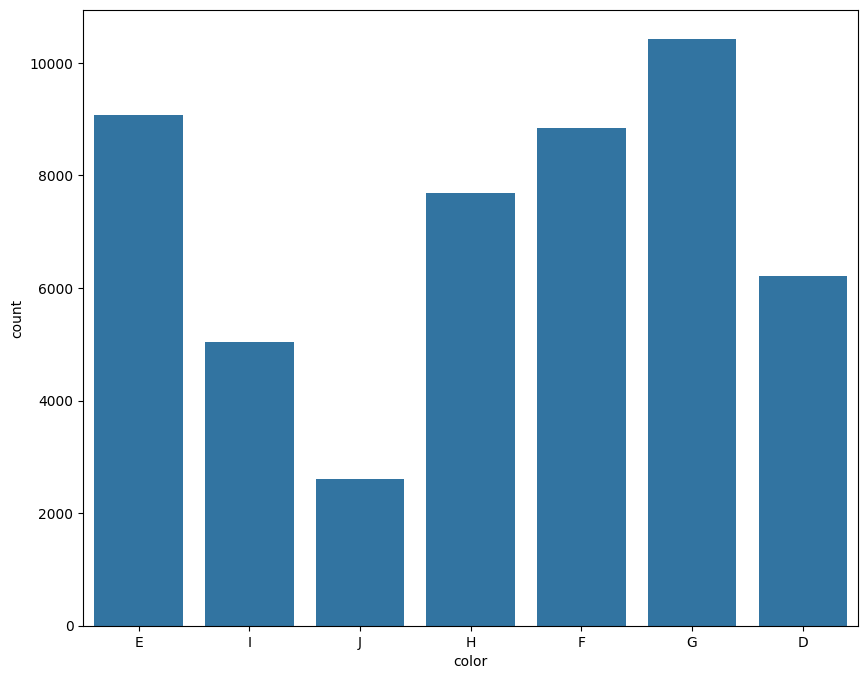

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="color")

<Axes: xlabel='clarity', ylabel='count'>

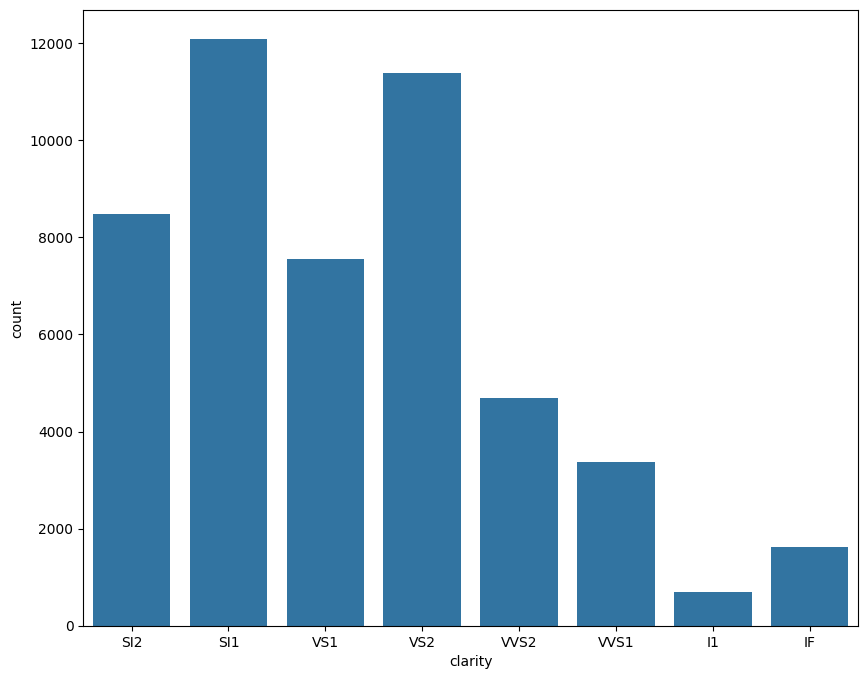

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x="clarity")

<Axes: xlabel='depth', ylabel='Count'>

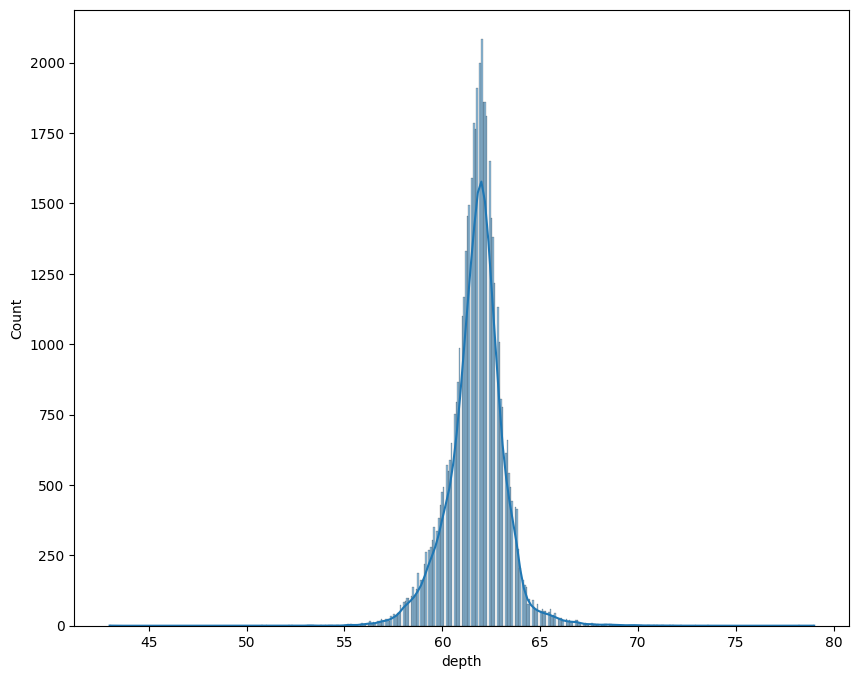

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="depth",kde=True)

Key Insights:
Normal Distribution:

The depth values appear to follow a normal distribution (bell-shaped curve) centered around the mean.
This suggests that most diamonds have a depth percentage that falls within a narrow, standard range.

<Axes: xlabel='table', ylabel='Count'>

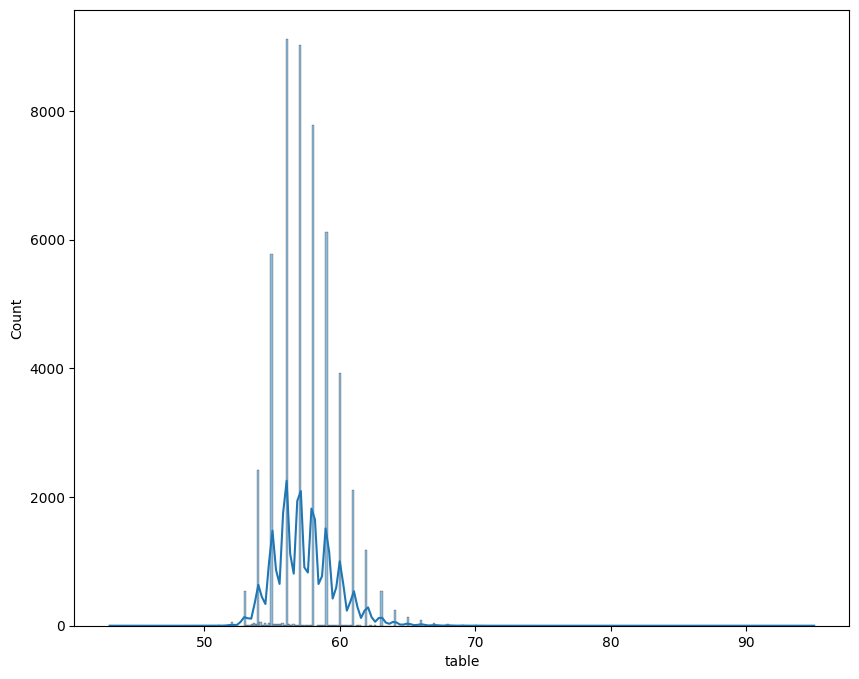

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="table",kde=True)

Skewed Distribution:

The table values are right-skewed (positively skewed), meaning most diamonds have table values within a narrow range, but a few have higher table values.
The majority of table values fall between 50 and 65, with some extreme outliers above 70.

<Axes: xlabel='price', ylabel='Count'>

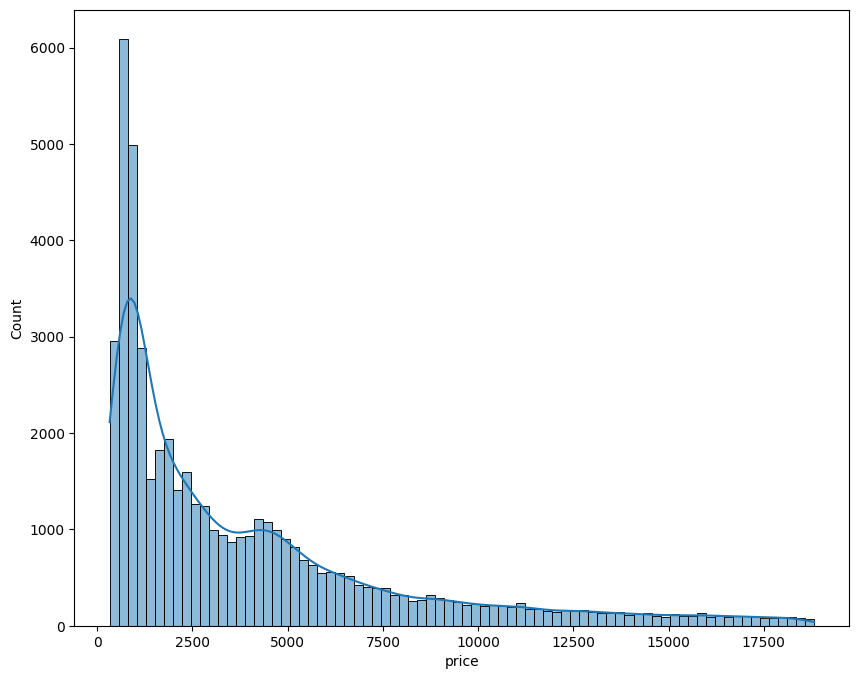

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="price",kde=True)

<Axes: xlabel='x', ylabel='Count'>

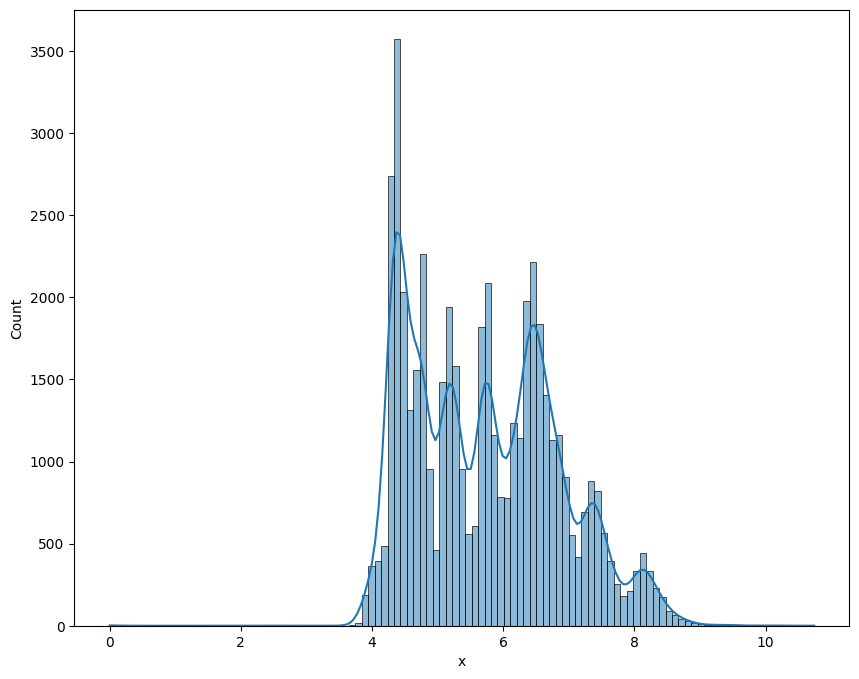

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="x",kde=True)

<Axes: xlabel='y', ylabel='Count'>

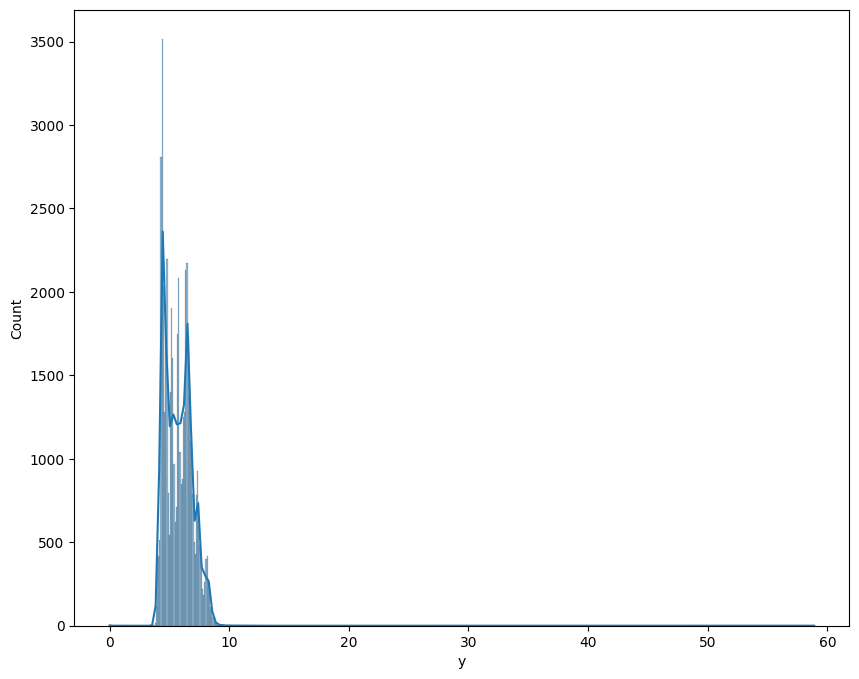

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="y",kde=True)

<Axes: xlabel='z', ylabel='Count'>

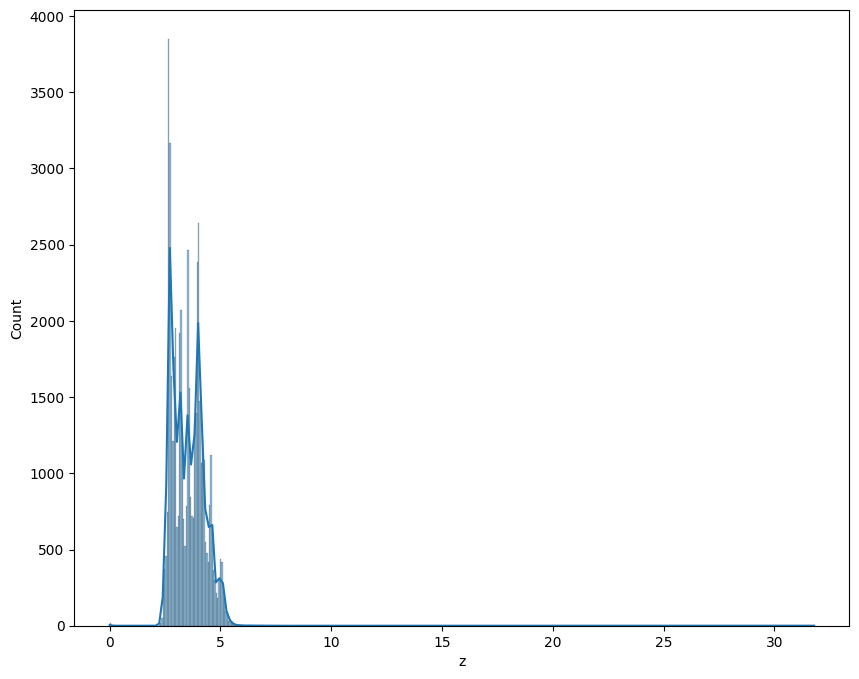

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="z",kde=True)


# correlation statistics

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['color'] = labelencoder.fit_transform(df['color'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# Define the desired order
df["cut"].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[0,1,2,3,4],inplace=True)

<ipython-input-362-c0a6e4e1e0ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["cut"].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],[0,1,2,3,4],inplace=True)
<ipython-input-362-c0a6e4e1e0ab>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cut"].replace(['Fair', 'Good', 'Very G

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,4,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,1,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,2,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,3,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df["clarity"].value_counts()

,count
clarity,
SI1,12086
VS2,11378
SI2,8483
VS1,7564
VVS2,4687
VVS1,3363
IF,1626
I1,687


In [ ]:
# Define the clarity mapping
clarity_mapping = {
    'IF': 7,
    'VVS1': 6,
    'VVS2': 5,
    'VS1': 4,
    'VS2': 3,
    'SI1': 2,
    'SI2': 1,
    'I1': 0
}  # replaced in order vise!

# Apply the mapping to the 'clarity' column
df['clarity_numeric'] = df['clarity'].map(clarity_mapping)

# Display the updated DataFrame with the numeric clarity column
print(df[['clarity', 'clarity_numeric']].head())


# then droping previous feature
df.drop('clarity', axis=1, inplace=True)

  clarity  clarity_numeric
0     SI2                1
1     SI1                2
2     VS1                4
3     VS2                3
4     SI2                1


In [ ]:
df

,carat,cut,color,depth,table,price,x,y,z,clarity_numeric
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,3,1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,1,1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,3,5,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,1,6,63.3,58.0,335,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,4,0,60.8,57.0,2757,5.75,5.76,3.50,2
49996,0.72,1,0,63.1,55.0,2757,5.69,5.75,3.61,2
49997,0.70,2,0,62.8,60.0,2757,5.66,5.68,3.56,2
49998,0.86,3,4,61.0,58.0,2757,6.15,6.12,3.74,1


Text(0.5, 1.0, 'Correlation Matrix')

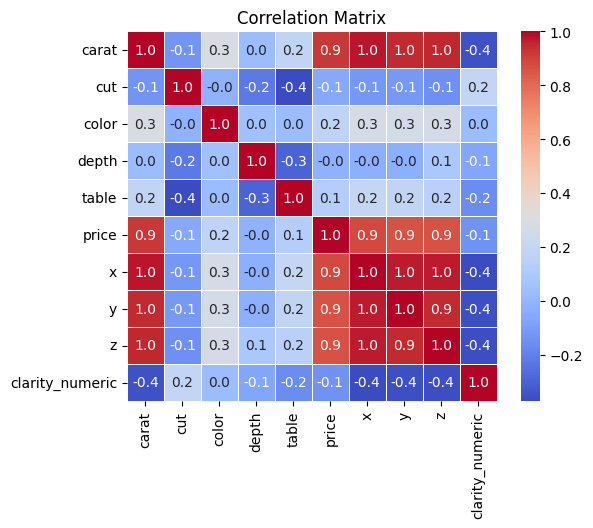

In [ ]:
# Correlation matrix
Corr_matrix = df.corr()

# Heatmap of correlation matrix

sns.heatmap(Corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0.5, robust=True,square=True) # 0.01f should be given for float values.
plt.title('Correlation Matrix')

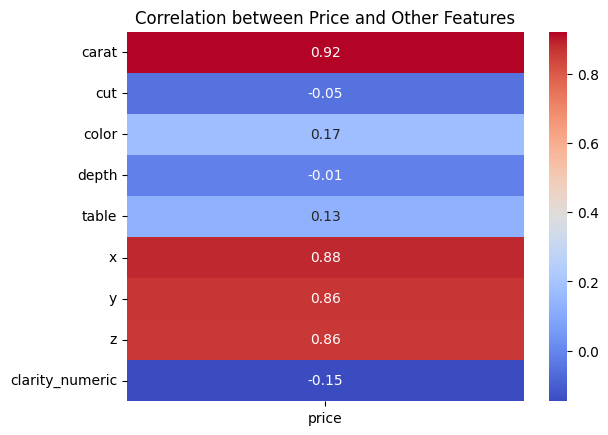

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between 'price' and all other columns
price_corr = df.corr()['price']

# Remove the correlation of 'price' with itself (which is always 1)
price_corr = price_corr.drop('price')

# Create a heatmap to visualize the correlations
sns.heatmap(price_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})  # to_frame() converts Series to DataFrame for heatmap
plt.title('Correlation between Price and Other Features')
plt.show()

In [ ]:
# droping less correlated feature
df.drop("cut",axis=1,inplace=True)
df.drop("depth",axis=1,inplace=True)

### in correlation step  color column converted to numeric with label encoder step , and clarity and cut columns are manually replaced because its ordianl data, and after cheking  correlation step less correlated features cut and depth are droped

# **skewness and log**

<Figure size 3000x800 with 0 Axes>

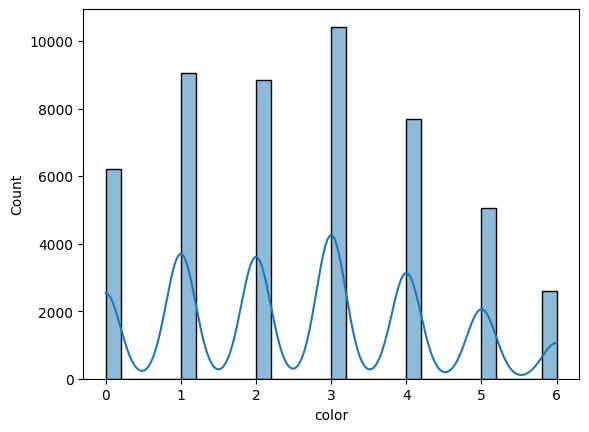

<Figure size 3000x800 with 0 Axes>

In [ ]:
# Normal distribution it is


sns.histplot(df["color"],bins=30, kde=True)
plt.figure(figsize=(30,8))

<Figure size 3000x800 with 0 Axes>

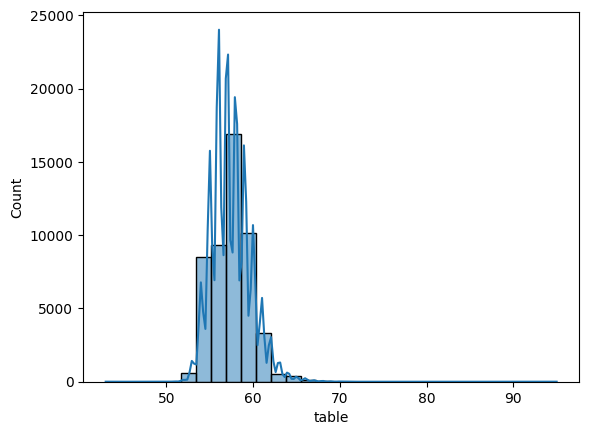

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df["table"],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['table'] = np.log1p(df['table'])

<Figure size 3000x800 with 0 Axes>

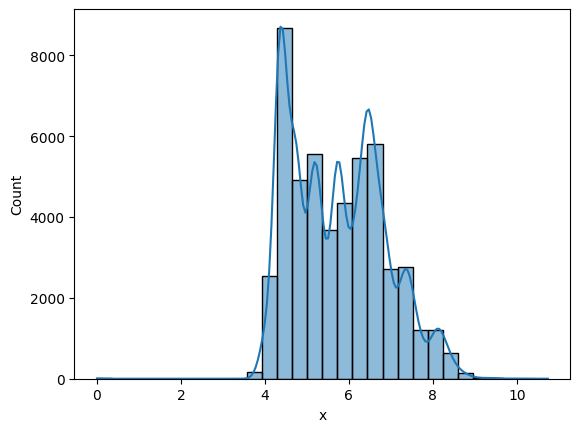

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df["x"],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['x'] = np.log1p(df['x'])

<Figure size 3000x800 with 0 Axes>

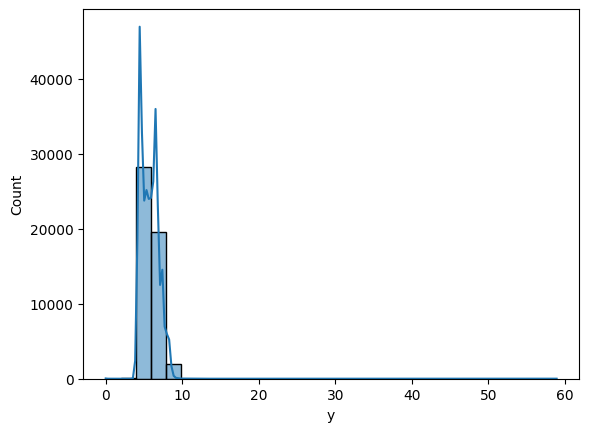

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df["y"],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['y'] = np.log1p(df['y'])

<Figure size 3000x800 with 0 Axes>

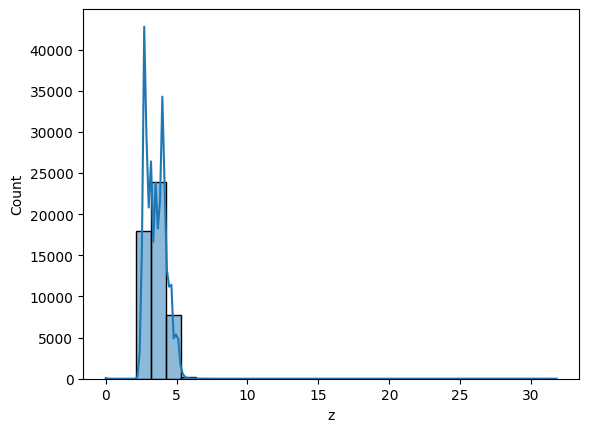

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df["z"],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['z'] = np.log1p(df['z'])

<Figure size 3000x800 with 0 Axes>

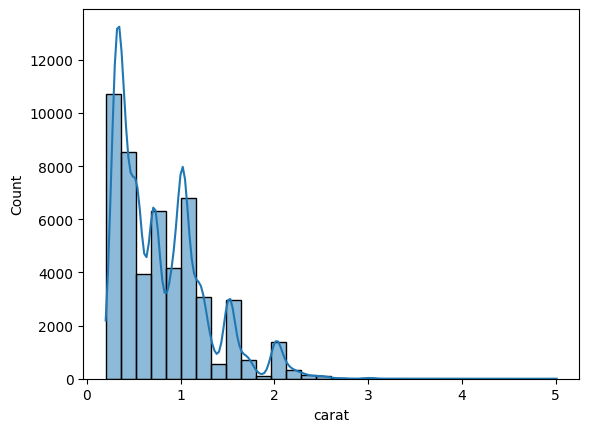

<Figure size 3000x800 with 0 Axes>

In [ ]:

sns.histplot(df["carat"],bins=30, kde=True)
plt.figure(figsize=(30,8))

In [ ]:
df['carat'] = np.log1p(df['carat'])

### in the skewness cheking logaritham aplying step color column is no noraml distribution  another columns have skewness so exept color column and target varible column are log transformed

# Outlier detection

In [ ]:
df.shape

(49874, 8)

<Axes: >

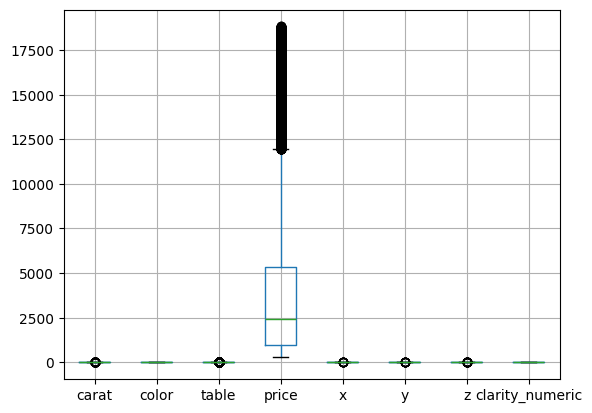

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='price')
df_cleaned

,carat,color,table,price,x,y,z,clarity_numeric
0,0.207014,1,4.025352,326,1.599388,1.605430,1.232560,1
1,0.190620,1,4.127134,326,1.587192,1.576915,1.196948,2
3,0.254642,5,4.077537,334,1.648659,1.654411,1.289233,3
4,0.270027,6,4.077537,335,1.675226,1.677097,1.321756,1
5,0.215111,6,4.060443,336,1.597365,1.601406,1.247032,5
...,...,...,...,...,...,...,...,...
49995,0.542324,0,4.060443,2757,1.909543,1.911023,1.504077,2
49996,0.542324,0,4.025352,2757,1.900614,1.909543,1.528228,2
49997,0.530628,0,4.110874,2757,1.896119,1.899118,1.517323,2
49998,0.620576,4,4.077537,2757,1.967112,1.962908,1.556037,1


### before outliers removing shape of data=(49874, 8),  after removing outliers shape of data changed to = (49235 × 8)  

In [ ]:
df=df_cleaned


# Feature engineering

In [ ]:

# Feature Engineering
df['volume'] = df['x'] * df['y'] * df["z"]# we can calculate the diamond's approximate volume using their diamonsion column  its compained to one feature
df['price'] = np.log1p(df['price'])  # Applying a log transformation to price can normalize the target variable, helping models to perform better with less skewed distributions.


In [ ]:
df1=df
df2=df
df3=df

### in this feature engineering step  the columns x,y,z are compained to volume, we can calculate the diamond's approximate volume using their diamonsion column(x,y,z)  its compained to one feature

- and applied to log transform to target varible because  Applying a log transformation to price can normalize the target variable, helping models to perform better with less skewed distributions.

## predicting without scaled data

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['color', 'table',"volume","carat","clarity_numeric"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.027500961477848522, RMSE: 0.16583413845722034, R-squared: 0.973129215113724


###  non scaled data prediction result is so accurate

## Daimansionality reduction

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['color', 'table',"volume","carat","clarity_numeric"]
scaler = StandardScaler().fit_transform(df[features])


# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # choosing 2 n_components
pca_result = pca.fit_transform(scaler)


# Add PCA results to the DataFrame
df1['pca1'] = pca_result[:, 0]
df1['pca2'] = pca_result[:, 1]


In [ ]:
from sklearn.model_selection import train_test_split
X = df1[["pca1","pca2"]]  # Features
y = df1['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.24802607973227006, RMSE: 0.49802216791250375, R-squared: 0.75765736626916


### **after pca prediction there will be lesser r^2 so skiping to another step**

## Data scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming  DataFrame is called 'df'
# Select the features that  want to scale
features = ['color', 'table',"volume","carat","clarity_numeric"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to  data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)
scaled_df["price"]=df['price']
df=scaled_df
df

,color,table,volume,carat,clarity_numeric,price
0,0.166667,0.280383,0.042347,0.022591,0.142857,5.789960
1,0.166667,0.798695,0.018028,0.007592,0.285714,5.789960
3,0.833333,0.546131,0.092929,0.066165,0.428571,5.814131
4,1.000000,0.546131,0.121275,0.080240,0.142857,5.817111
5,1.000000,0.459080,0.045957,0.029999,0.714286,5.820083
...,...,...,...,...,...,...
49995,0.000000,0.459080,0.376648,0.329359,0.285714,7.922261
49996,0.000000,0.280383,0.384956,0.329359,0.285714,7.922261
49997,0.000000,0.715891,0.373074,0.318658,0.285714,7.922261
49998,0.666667,0.546131,0.451399,0.400950,0.142857,7.922261


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['color', 'table',"volume","carat","clarity_numeric"]]  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.02750096147784852, RMSE: 0.1658341384572203, R-squared: 0.973129215113724


### minimaxscaled and non scaled data have same prediction and its r^2 is higer mse lower so choosing this as the final model

## **another prediction methods**

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = df1[['color', 'table',"volume","carat","clarity_numeric"]]  # Features
y = df1['price']  # Target variable # Target variable

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,color,table,volume,carat,clarity_numeric
15864,1,4.025352,6.706538,0.737164,2
17088,3,4.005513,6.458855,0.693147,5
1425,3,4.043051,5.103166,0.470004,6
10143,5,4.077537,6.831289,0.774727,2
24976,5,4.060443,9.558393,1.252763,3
...,...,...,...,...,...
11498,4,4.110874,6.575079,0.722706,4
45401,3,4.060443,4.806288,0.425268,5
38732,2,4.110874,4.660642,0.405465,2
875,2,4.094345,5.753731,0.587787,2


In [ ]:
y_train

,price
15864,8.832004
17088,8.925454
1425,8.007034
10143,8.500047
24976,9.738377
...,...
11498,8.565602
45401,7.626570
38732,7.131699
875,7.969358


In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²
Linear Regression         0.128383  0.165481  0.973141
Ridge Regression          0.128820  0.166033  0.972962
Lasso Regression          0.615338  0.718340  0.493883
ElasticNet Regression     0.442075  0.526329  0.728290
Decision Tree             0.112464  0.151047  0.977622
Random Forest             0.093511  0.123653  0.985003
Gradient Boosting         0.087673  0.113258  0.987419
Support Vector Regressor  0.092967  0.118721  0.986176
K-Nearest Neighbors       0.090968  0.118216  0.986293
Neural Network            0.095707  0.124497  0.984798


# **.Documentation and reporting**

In [ ]:

# comparing to all predictions Gradient Boosting data has less mse and higher r^2 so decided to report with  this linear regression model
print( "comparing to all predictions Gradient Boosting data has less mse and higher r^2 so decided to report with  this linear regression model")




from sklearn.model_selection import train_test_split
X = df3[['color', 'table',"volume","carat","clarity_numeric"]]  # Features
y = df3['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = GradientBoostingRegressor() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

print()
print()


# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with price': df.corr()['price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")






comparing to all predictions Gradient Boosting data has less mse and higher r^2 so decided to report with  this linear regression model
MSE: 0.012880621811056932, RMSE: 0.11349282713483232, R-squared: 0.9874145339185624


EDA Summary:
Dataset Shape: (49235, 6)
Missing Values: 0
Correlation with price: price              1.000000
volume             0.962186
carat              0.955215
table              0.164485
color              0.153070
clarity_numeric   -0.208720
Name: price, dtype: float64


**Based on the analysis of Diamonds price dataset for predicting the price , the Gradient Boosting  model demonstrated the best perfomance.**

 Based on the evaluation of the regression models for predicting price , the Gradient Boosting  model with learning rate of 0.25 and random state set to 42 emerged as the best-performing  model. it achived the highest accuracy and consistently strong results.

- Best model is that the non scaled models have better prediction and highest accuracy and consistancy

- some changes on datsets given below:

 - in this data set prediction step after reffering some chatbots and datsets i decided to logaritham applying on target variable.  because chatbot says  target varible has skewness so logaritham applying helps to improve model performance.
 - if we need model deploying part log transformed target varible should reverse with exponantioal method  **Thats  important because target varible log transformed**.